In [19]:
import numpy as np
from Params import *
from FBclass import FB
from RK4class import RK4
from SemiImplicit import SemiImplicit as SI
import matplotlib.pyplot as plt
# from model import *
from Analytical import *
from functions import *
import time

## Task A Derivations + Task B Drawing
In this project, we used the Stommel model to represent a wind-driven circulation in a closed ocean basin, with the fluid is assumed to be incompressible with a free surface and a solid lower boundary. The vertical pressure gradient of the fluid is also assumed to be in hydrostatic balance. The model uses the shallow water equations, linearised about a resting state, with the addition of linear drag, with a coefficient, $\gamma = 10^{-6}s^{-1}$ and wind stress 
\begin{equation}
\mathbf{\tau} = 
\begin{pmatrix}
    \tau_x \\
    \tau_y 
\end{pmatrix} = \tau_0
\begin{pmatrix}
    -\cos(\frac{\pi y}{L}) \\
    0
\end{pmatrix}
\end{equation}
where $\tau_0 = 0.2Nm^{-2}$. In the model, the fluid is of a uniform density of $\rho = 1000kgm^{-1}$, the gravitational constant, $g$, is $10ms^{-2}$ and the coriolis parameter is approximated using a $\beta$-plane, with
\begin{equation}
    f = f_0 +\beta y
\end{equation}
where $f_0 = 10^{-4}s^{-1}$ and $\beta = 10^{-11}m^{-1}s^{-1}$.


The model is intended to support Kelvin, Rossby and inertia gravity waves. Of the three types of waves, inertia gravity waves have the greatest velocity, $U$, of about 100 $ms^-1$ in one direction. While these waves are not likely to be spawned by our initial condition of a flat height, $\eta$ field, they could be spawned by other phenomenon during the integration in the model. We are not expecting to observe any waves in any steady-state solution, since in the steady-state, $\frac{\partial\eta}{\partial t} = 0$, and thus $\frac{\partial \mathbf{V}}{\partial t} = 0$. 


The Rossby radius of deformation was calculated to be $10^6m$ using
\begin{equation}
    R_D = \frac{\sqrt{gH}}{f_0}
\end{equation}
where $g$ is the gravitational constant, $H$ is the resting depth of the fluid, 1000m, and $f_0$ is the coriolis parameter in the middle of the model domain,  $10^{-4}$.

From Stommel (1948), the width of the strongest region of the western boundary current is less than 100km. In order to ensure that the waves are resolved in this region, I chose $d = \frac{100km}{4} = 25km$. 


Since $d<<R_D$, a high-resolution grid is needed. I chose the Arakawa-C grid, as the dispersion relationship is closest to the analytical relationship. The Arakawa-C grid also has the advantage of needed interpolation only for the coriolis term. The staggered grid is illustrated in Figure 1, with the indices corresponding to those used in the code. No-normal flow boundary conditions were used for $u$ and $v$, the zonal and meridional components of velocity respectively. No boundary conditions were defined for $\eta$, as $\eta$ is not defined on the boundaries.


Using the 2D CFL criterion, I calculated the maximum timestep, $\Delta t$ that can be used, using
\begin{equation}
    \Delta t \le \frac{d}{U\sqrt{2}} = 176.8s
\end{equation}
A $\Delta t$ of $160s$ was chosen, as a $\Delta t$ too close to the CFL minimum lead to instabilities in model, due to the oscillatory nature of the Foward-Backward time scheme (See Appendix). 

FORWARD BACKWARD TIME
$\eta$ and relation to H





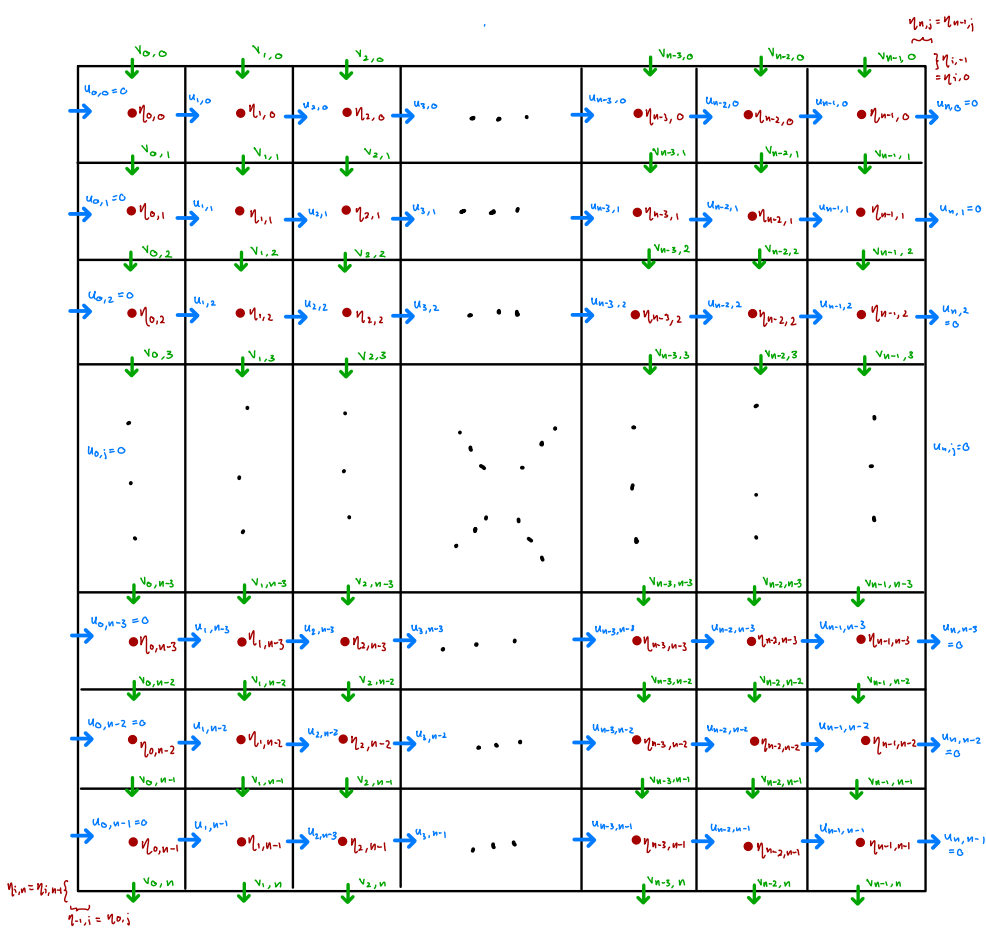

Figure 1: Illustration of the Arakawa C grid variable stagger used in the model.

## Analytical Solutions

The analytical solution of the equations used in the model was derived by Mushgrave (1985) for a steady-state (Figure 2). The analytical elevation is determined up to an unknown constant of integration, $\eta_0 = \eta((x = 0, y = \frac{L}{2})$. This unknown constant was taken from the final $\eta(0, \frac{L}{2}) in the model so that the model solution could be compared to the analytical solution, to judge the accuracy of the model. 

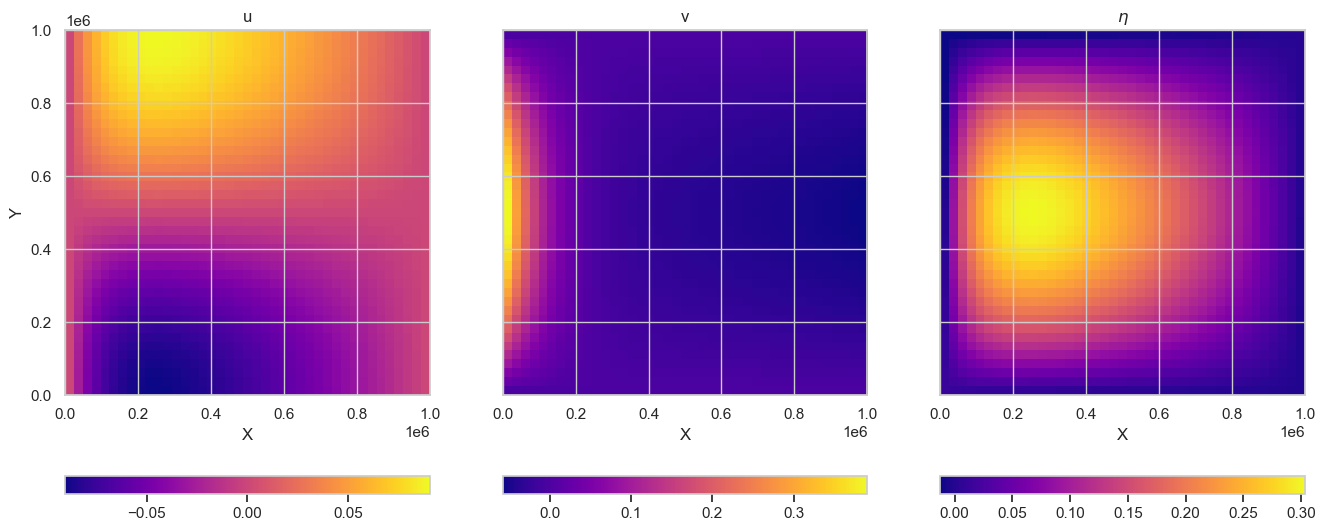

In [2]:
plot_analytical(1e6, 25e3)

Figure 2: Analytical solution for $u$, $v$ and $\eta$ with $\eta_0=0$.

### Task D: 1 day

The model was run for one day to check for stability, and to ensure that the model was beginning to produce the gyre we expect to see. 

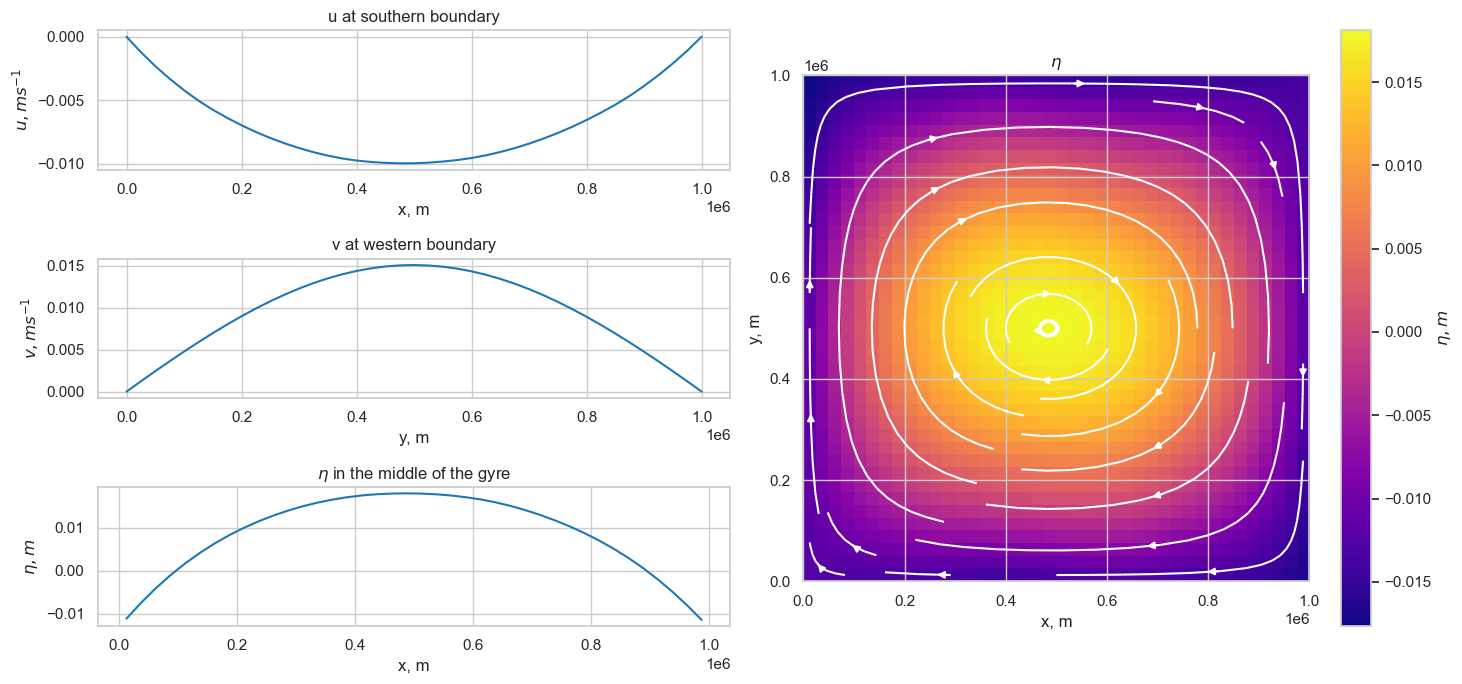

In [3]:
L = 1e6
d = 25e3
n = int(L/d)
dt = 160
endtime = day
nt = int(endtime/dt)

sim = FB(L, d, dt, nt)
sim.run()
sim.plot_1d(plot_analytical = False)

Figure 3: (a) Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively (b) 2D plot of $\eta$ and the streamlines plotted over show that a clockwise gyre is forming,

Negative u at southern boundary, and positive v at western boundary, with magnitude of both increasing with distance away from the boundary in the other direction. Clockwise (anticyclonic for NH) gyre seen. Positive height anomaly in the centre of the gyre, negative $\eta$ at the boundaries. Flow is forced by wind stress, mass conservation, clockwise gyre. WBC not yet observed, gyre mostly symmetrical.

### Task D/E: Steady State

The total energy perturbtion of the model from the resting ocean (initial conditions) can be calculated using
\begin{equation}
    E(v, u, \eta) = \int\limits^L_0\int\limits^L_0\frac{1}{2}\rho(H(u^2+v^2) + g\eta^2)dxdy.
\end{equation}
Since all $u$ and $v$ defined on the boundaries are 0, only the interior points are included in the calculation, and we can thus take $dxdy = d^2$ for each grid point, making the calculation straightforward. 


The model was run and total energy pertubration calculated at each timestep until the difference in energy between subsequent timesteps was less than $1J$, indicating a steady state (Figure 4). This occured at 20982 timesteps, corresponding to 38.9 days. From Figure 4, the energy increases slowly at the beginning, then speeds up, before tapering off into the steady state. Since energy is not increasing exponentially, we can conclude that our model is stable for the paramters chosen above. The profiles of $u$ at the southern boundary, $v$ at the western boundary, and $\eta$ in the middle of the the gyre  were plotted, in addition a plot of the $\eta$ field with the streamlines plotted over. 

Steady clockwise gyre with WBC (what is balancing the wind stress? drag, possibly coriolis). Imshow appears similar to analytical solution in Figure 1. 

Steady-state reached in 20982 timesteps,                   corresponding to 38.9 days


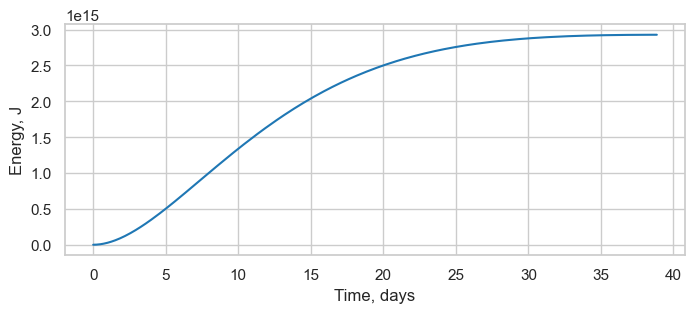

In [4]:
endtime = 100*day
nt = int(endtime/dt)

long = FB(L, d, dt, nt, energy = True)
long.run_SS()
long.plot_energy()

Figure 4: Time series of total energy of the perturbation from the resting ocean for $\Delta t = 160$ and $d = 25km$. The energy increases before plateauing into a steady state, at about 39 days. 

Steady-state reached in 20982 timesteps,                   corresponding to 38.9 days


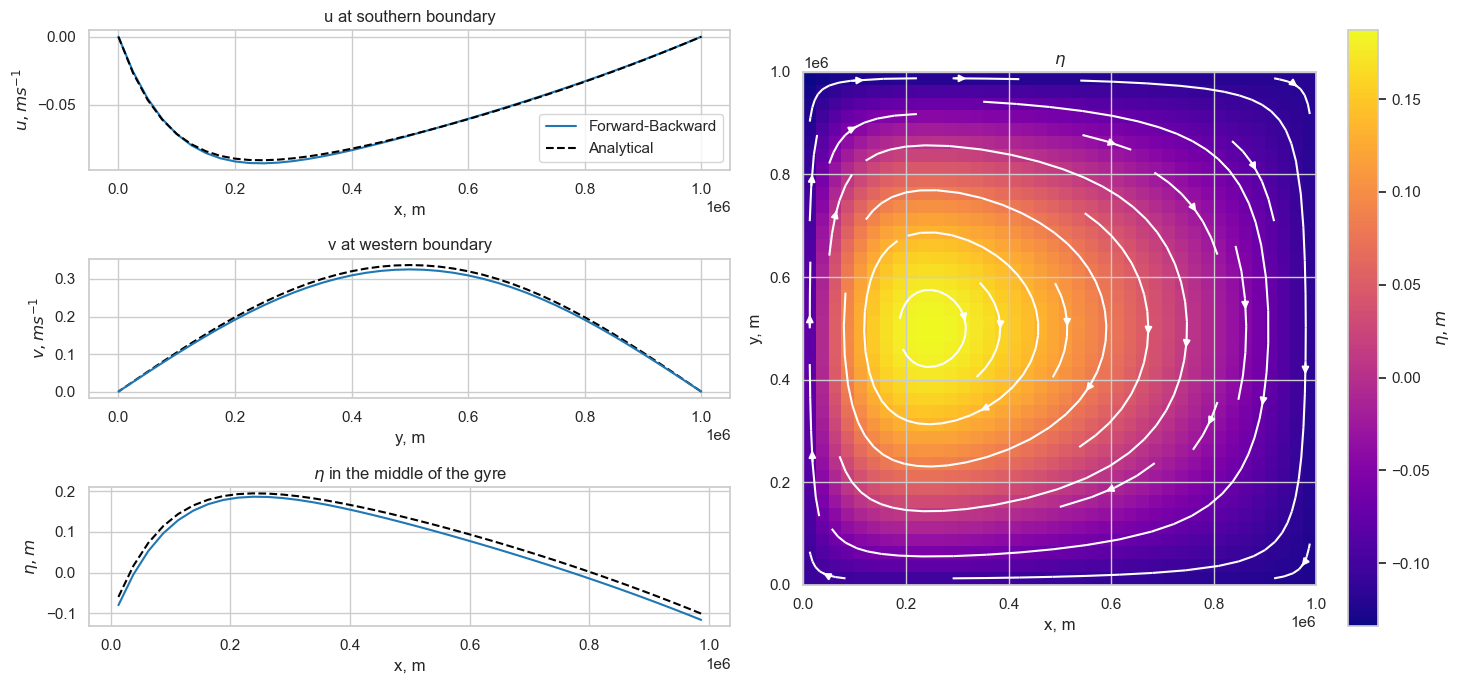

In [5]:
nt = int(40*day/dt + 1/2)
long = FB(L, d, dt, nt, energy = True)
long.run_SS()
long.plot_1d()

 Figure 5: Plots of $u$, $v$ and $\eta$ at the southern boundary, western boundary, and the middle of the gyre respectively, and the $\eta$ field with streamlines plotted on top after the model has reached steady-state. The plots show a clockwise (anti-cyclonic) gyre with a northward western boundary current.

### Task D3: Differences between steady state and analytical model

Solution - SS

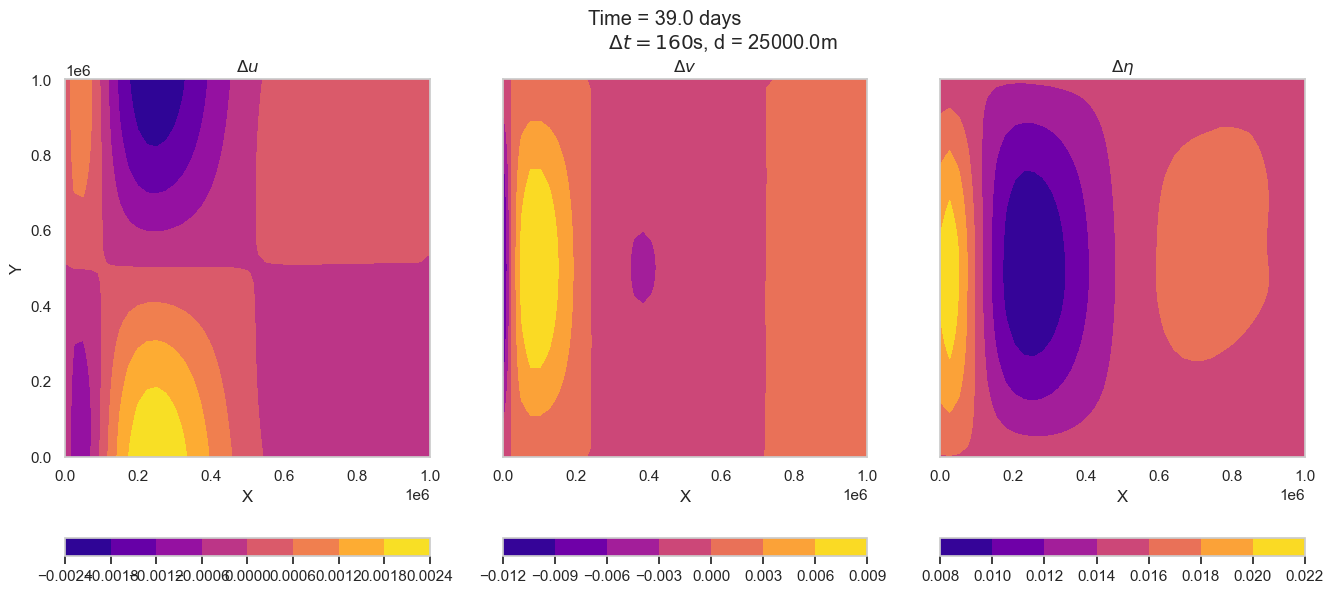

In [6]:
long.plot_solution_diff()

Higher magnitudes of u underrepresented. higher values of v overrepresented (represented not good word). Eta in middle of gyre more than analytical solution, but greater error in the region with western boundary current. 

?? halving d means 4 times as many grid points, and then you have to half dt, so you have twice as many timesteps for the same amount of time, so we would expect it to be 8? If we were only looking at the grid point calculations?? so what is making it faster/slower??

In [7]:
endtime = 40*day
d0, dt0 = 25e3, 160
ratio = dt0/d0
Es = []
ds = np.array([10, 12.5, 15, 17.5, 20, 22.5, 25])
times = []
for d in ds:
    d = d*1e3
    dt = ratio*d
    nt = int(endtime/dt)
    varyd = FB(L, d, dt, nt)
    start = time.time()
    varyd.run()
    times.append(time.time()-start)
    Ediff = varyd.calc_Ediff()
    Es.append(Ediff)


Text(0, 0.5, 'Runtime, s')

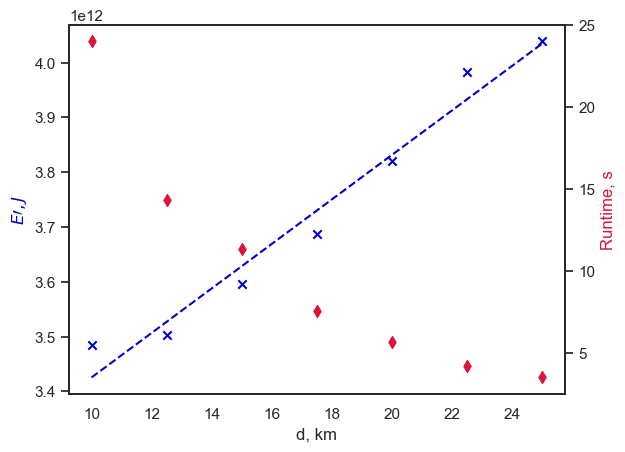

In [8]:
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('white')
def linear(x, m, c):
    return m*x + c
def quadratic(x, a, b):
    return a*np.exp(b*x)
res = curve_fit(linear, ds, Es, p0 = [1e10, 1e12])[0]
fig, ax = plt.subplots()
color = 'mediumblue'
color1 = 'crimson'
ax.scatter(ds, Es, marker = 'x', color = color)
ax.plot(ds, linear(ds, res[0],res[1]), label = 'Linear Fit', linestyle = '--', color = color)
ax.set_ylabel('$E\prime, J$', color = color)
ax.set_xlabel('d, km')
ax1= ax.twinx()
    
ax1.scatter(ds, times, color = color1, marker = 'd')
# ax1.plot(ds, ds, label = 'Quadratic Fit', linestyle = '--', color = color1)

ax1.set_ylabel('Runtime, s', color = color1)
# ax1.set_yscale('log')


In [9]:
print(times[1],times[-1])

14.295236825942993 3.4896774291992188


Approximately linear relationship

###  Semi Lagrangian Method. 

\begin{equation}
    \frac{Du}{Dt} = f_0 v

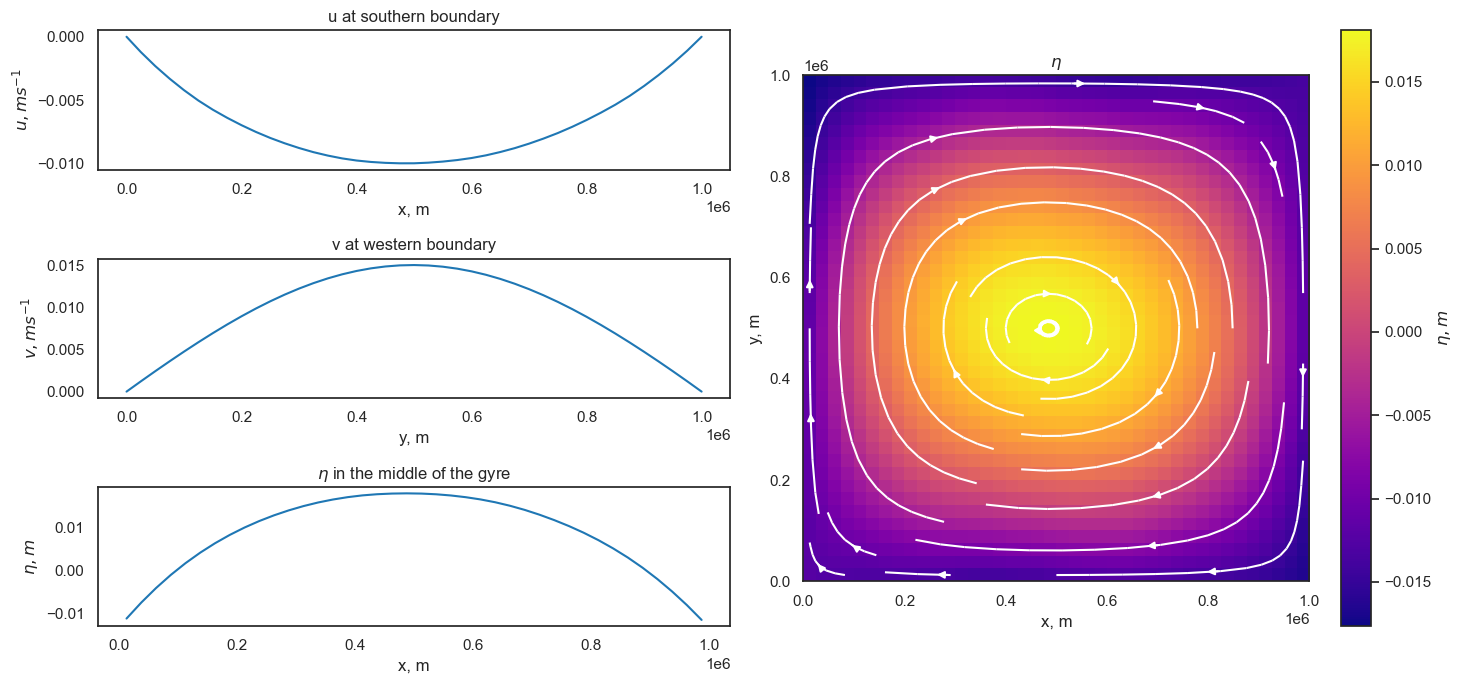

In [10]:
from SLclass import SL
N = int(1*day/160)
semi = SL(1e6, 25e3, 160, N)
semi.run()
semi.plot_1d(scheme = 'Semi-Lagrangian', plot_analytical = False)

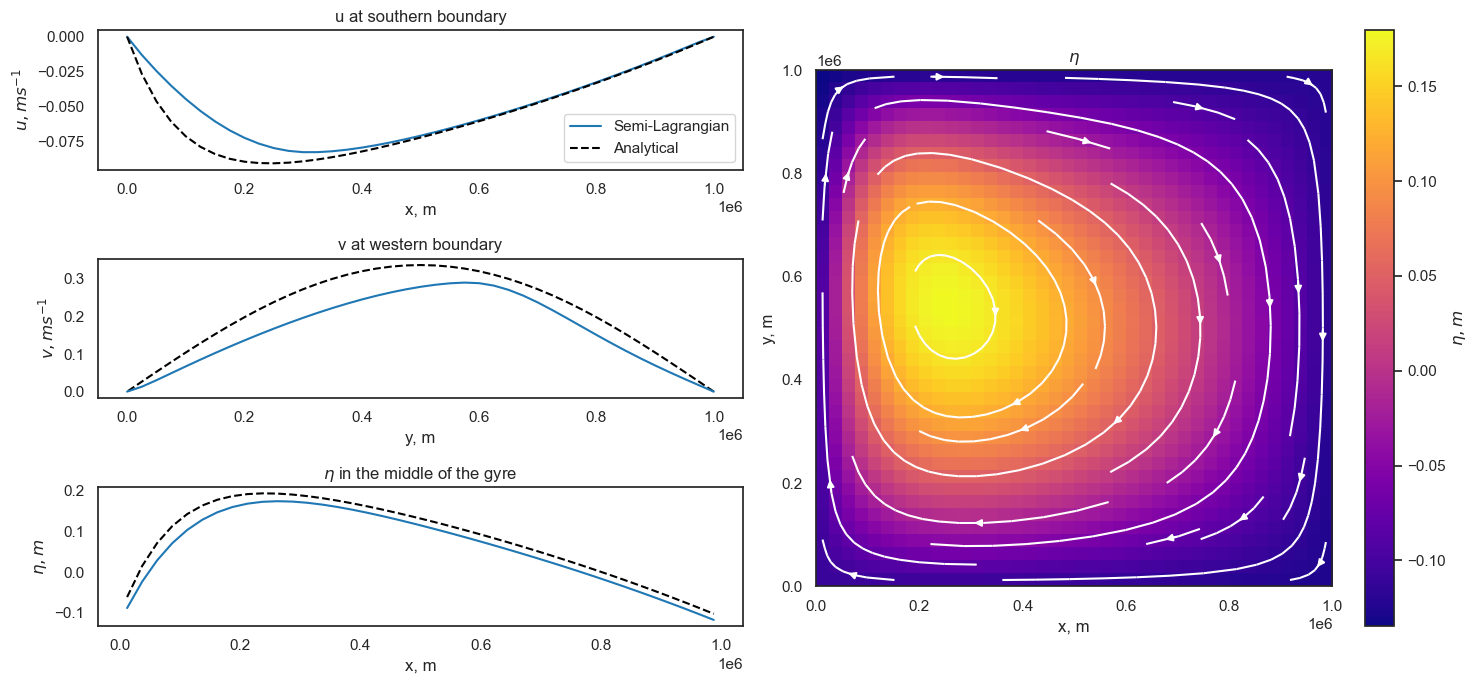

In [11]:
N = int(40*day/160)
semi = SL(1e6, 25e3, 160, N)
semi.run()
semi.plot_1d(scheme = 'Semi-Lagrangian')

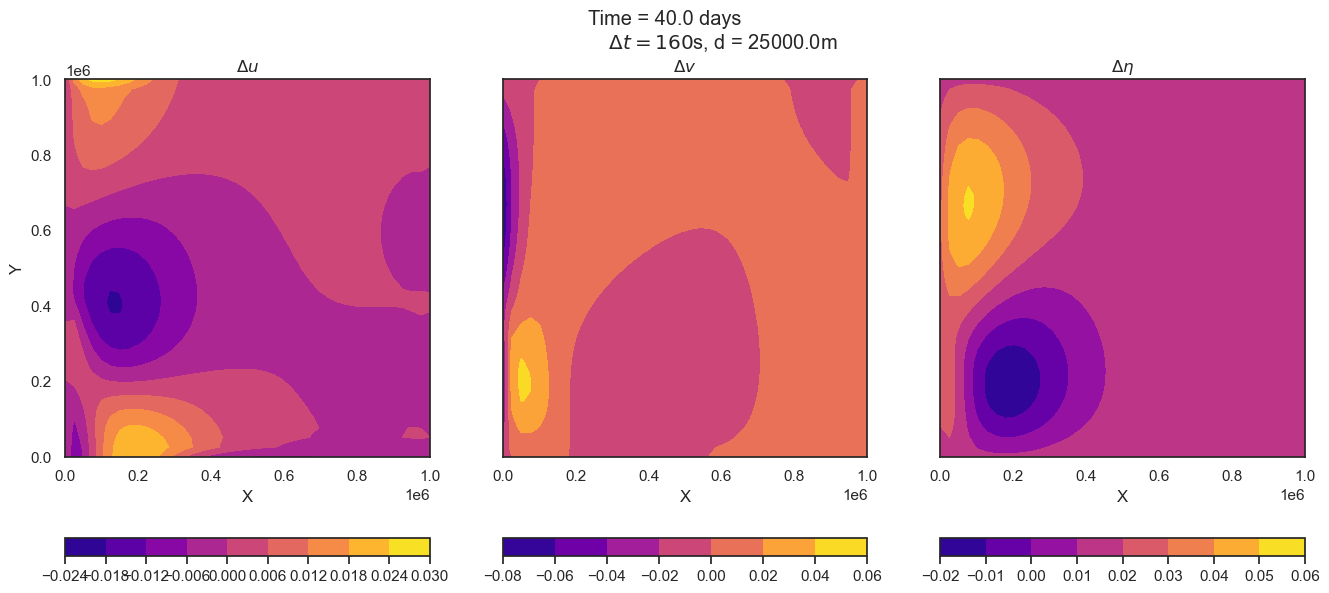

In [12]:
semi.plot_solution_diff()

In [13]:
Ediff = semi.calc_Ediff()
print(f"{Ediff:.2e}J")

8.64e+13J


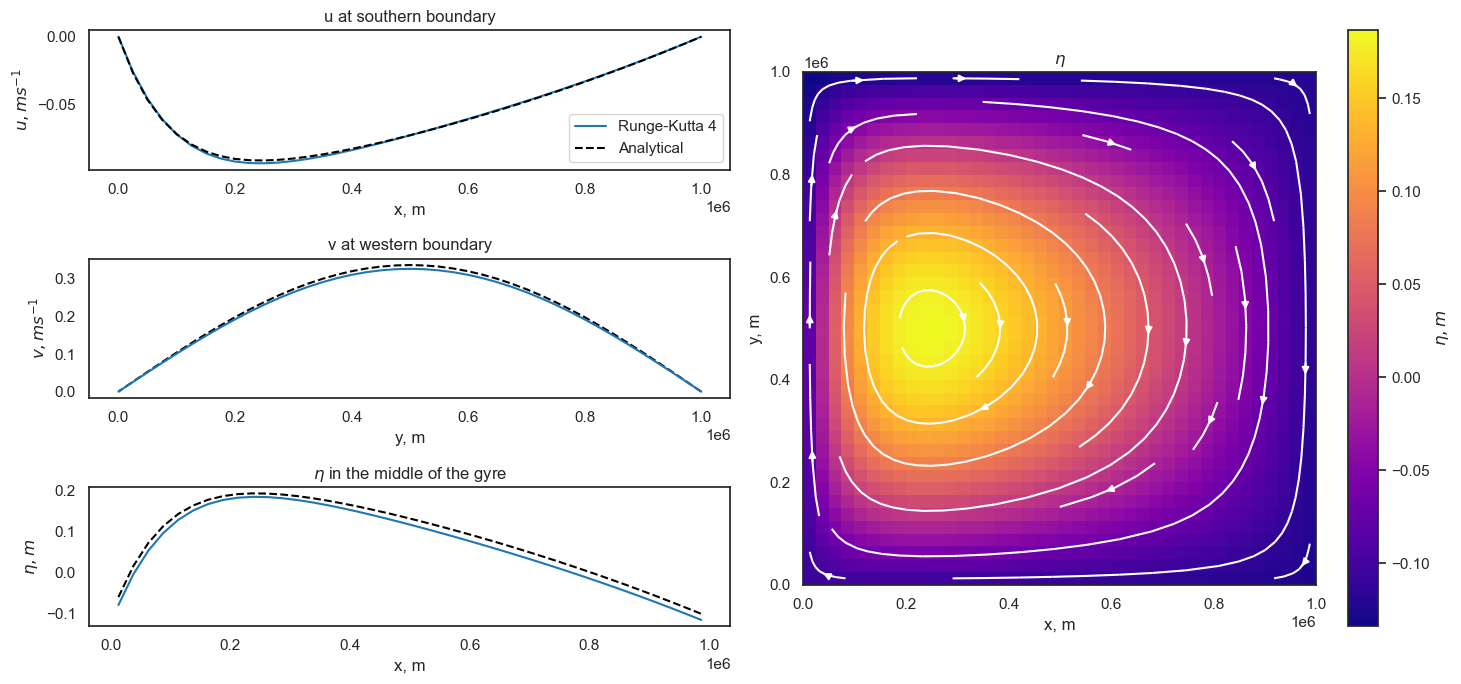

In [16]:
RK = RK4(1e6, 25e3, 160, N)
RK.run()
RK.plot_1d(scheme = 'Runge-Kutta 4')

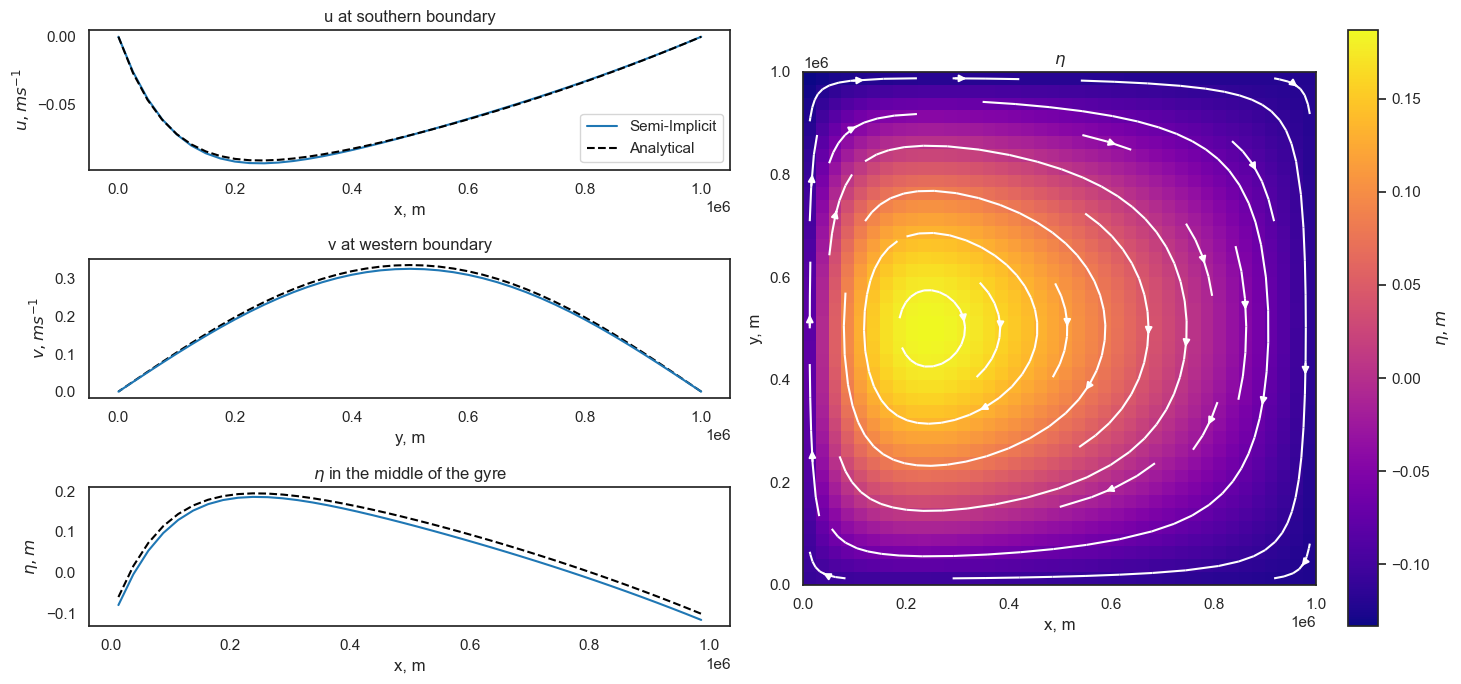

In [20]:
SemiI = SI(1e6, 25e3, 160, N)
SemiI.run()
SemiI.plot_1d(scheme = 'Semi-Implicit')